# Exploratory Data Analysis on bill Invoices datastes

### Contents
1. [Data Ingestion and Summary](#1)  
2. [Handling Missing Values and Columns of Inappropriate datatype](#2)  
3. [Data Analysis on purchases](#3)  
4. [Bounding Box Analysis](#4)  
5. [NLP Analysis on Table Column](#5)  


In [ ]:
%pip install -r requirements.txt
# Depending upon your environment, you may need to use the above line or the one below
# !pip install -r requirements.txt

In [2]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import seaborn as sns

### <a id='1'>Data Ingestion and Summary</a>

In [3]:
df = pd.read_csv('train/gt.csv')

In [4]:
df

,title,invoice_number,invoice_number_bbox,issue_date,issue_date_bbox,total,total_bbox,table,table_bbox
0,5f5f7af4-933d-47f6-9fe0-ab05eab6ef71.jpg,1,"[487, 95, 498, 110]",04/04/2020,"[718, 96, 797, 114]",52510,"[816, 1065, 942, 1084]",SI Description of Goods HSN/SAC Quantity Rate ...,"[11, 552, 950, 662]"
1,131f7202-9aae-4a9d-a928-e5e57f62b0ea.jpeg,RSN/18-19/4126,"[608, 130, 720, 142]",09/03/2019,"[733, 130, 847, 142]",76900,"[764, 812, 850, 825]",S Description of Goods HSN/SAC GST Quantity Ra...,"[76, 344, 857, 449]"
2,09922092-d196-471f-86d4-38366beee9e8.png,DEL5-2187145,"[962, 558, 1112, 575]",25/08/2019,"[1000, 618, 1112, 634]",21490,"[1005, 849, 1111, 867]",SI. Net Tax Tax Tax Total\nDescription Unit Pr...,"[83.00039999999998, 668.999825, 1114.0008, 836..."
3,f248a9ed-e8e5-4af0-836f-4eb58886e894.jpeg,FAAOOL1801015598,"[326, 253, 413, 265]",25/09/2017,"[342, 266, 403, 274]",5391,"[509.9, 741.1, 550.8, 762.8]",Product Qty Price COST a Total\nHandsets/ VT59...,"[8.00026, 425.99952, 584.000163, 480.098880000..."
4,4ea82b85-8047-4f49-a6a1-e6de8af5ce0d.png,NaN,[],NaN,[],198.4,"[1123, 756, 1190, 770]",Date Item Description Total Unit Costs Tax Rat...,"[35.000112, 566.000385, 1194.99996, 647.99998]"
...,...,...,...,...,...,...,...,...,...
56,22061e07-c158-4548-ae2d-f40e20dabb73.png,4444 Po AB123,"[317.5, 681.9, 410.2, 695.8]",15/09/2010,"[535, 108, 601, 118]",1800,"[682, 680, 740, 690]",11. 12 Specification of commodities (und of pa...,"[28.999912, 419.00032, 740.9997800000001, 497...."
57,bbceab98-2049-487b-bc29-85dee1daad7f.jpg,205,"[600, 155, 619, 162]",11/03/1993,"[59, 396, 114, 407]",280832,"[649, 880, 709, 890]",UNIT EXTENDED\nPRICE PRICE\nQUANTITY ITEM DESC...,"[52.000364, 437.00000000000006, 717.0004660000..."
58,897aa322-67ca-4eb0-801c-6db864c6af49.jpg,NaN,[],05/07/2015,"[588, 181, 639, 188]",24,"[763, 555, 787, 561]",11 12 Spectation of commodities (kind of packa...,"[59.9998, 353.99980000000005, 799.999600000000..."
59,f1b24122-4e43-4540-b035-e245de3b6d68.jpg,BT-1638,"[627, 80, 667, 88]",03/01/2002,"[80, 856, 124, 863]",309400,"[638, 695, 673, 703]","Line Country\nNo. Item Number, Harmonized Numb...","[41.999840000000006, 380.00032, 681.0001920000..."


In [5]:
df.describe()

,title,invoice_number,invoice_number_bbox,issue_date,issue_date_bbox,total,total_bbox,table,table_bbox
count,61,49,61,58,61,60,61,61,61
unique,61,45,50,51,59,57,61,59,61
top,5f5f7af4-933d-47f6-9fe0-ab05eab6ef71.jpg,US-001,[],11/02/2019,[],154.06,"[816, 1065, 942, 1084]",QTY DESCRIPTION UNIT PRICE AMOUNT\n1 Front and...,"[11, 552, 950, 662]"
freq,1,4,12,5,3,4,1,3,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                61 non-null     object
 1   invoice_number       49 non-null     object
 2   invoice_number_bbox  61 non-null     object
 3   issue_date           58 non-null     object
 4   issue_date_bbox      61 non-null     object
 5   total                60 non-null     object
 6   total_bbox           61 non-null     object
 7   table                61 non-null     object
 8   table_bbox           61 non-null     object
dtypes: object(9)
memory usage: 4.4+ KB


There are few null values shown from df.info, which we should drop.
Similarly all the columns are object dtype, which we should change into appropriate DataType

### <a id='2'>Handling Missing Values and Columns of Inappropriate datatype

In [7]:
df.dropna(inplace=True)

In [8]:
df["issue_date"] = pd.to_datetime(df["issue_date"], format="%d/%m/%Y")

In [9]:
df['Year'] = df['issue_date'].dt.year
df['Month'] = df['issue_date'].dt.month
df['Day'] = df['issue_date'].dt.day

In [10]:
df["invoice_number_bbox"]= df["invoice_number_bbox"].apply(lambda x: np.array(eval(x)))
df["issue_date_bbox"] = df["issue_date_bbox"].apply(lambda x: np.array(eval(x)))
df["total_bbox"] = df["total_bbox"].apply(lambda x: np.array(eval(x)))
df["table_bbox"] = df["table_bbox"].apply(lambda x: np.array(eval(x)))

In [11]:
df['total'] = pd.to_numeric(df['total'], errors='coerce')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 59
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   title                47 non-null     object        
 1   invoice_number       47 non-null     object        
 2   invoice_number_bbox  47 non-null     object        
 3   issue_date           47 non-null     datetime64[ns]
 4   issue_date_bbox      47 non-null     object        
 5   total                46 non-null     float64       
 6   total_bbox           47 non-null     object        
 7   table                47 non-null     object        
 8   table_bbox           47 non-null     object        
 9   Year                 47 non-null     int32         
 10  Month                47 non-null     int32         
 11  Day                  47 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(7)
memory usage: 4.2+ KB


In [13]:
df.dropna(inplace=True)

### <a id='3'> Data Analysis on purchases</a>

In [14]:
df['Year'].value_counts()

Year
2019    10
2020     5
2018     5
2021     5
2017     4
2016     3
2022     3
2008     2
2015     2
2011     1
2014     1
2000     1
2005     1
2010     1
1993     1
2002     1
Name: count, dtype: int64

Most of the purchases were made in 2019

In [15]:
df.dropna(inplace=True)

Let's look at the maximum purchase

In [16]:
df.iloc[df['total'].idxmax()]

title                           56415ebf-98cc-4050-a4eb-58de6c5d22bf.jpg
invoice_number                                                     34567
invoice_number_bbox                                 [298, 102, 320, 108]
issue_date                                           2022-07-04 00:00:00
issue_date_bbox                                     [362, 101, 404, 107]
total                                                            19860.0
total_bbox                                          [509, 614, 548, 619]
table                  Product Code Description of Goods HS Code Unit...
table_bbox             [41.99995800000001, 309.00021999999996, 550.00...
Year                                                                2022
Month                                                                  7
Day                                                                    4
Name: 25, dtype: object

Let's look at the minimum purchae

In [17]:
df.iloc[df['total'].idxmin()]

title                           96b76cae-7a13-4585-97b6-858c4f56d008.pdf
invoice_number                                                     30136
invoice_number_bbox                                 [167, 360, 232, 379]
issue_date                                           2000-07-19 00:00:00
issue_date_bbox                                     [170, 243, 260, 262]
total                                                            3443.85
total_bbox                                      [1460, 1743, 1545, 1760]
table                  No. Unit of Description of Goods Country\nUnit...
table_bbox             [104.99922600000001, 1005.002808, 1550.9990460...
Year                                                                2000
Month                                                                  7
Day                                                                   19
Name: 46, dtype: object

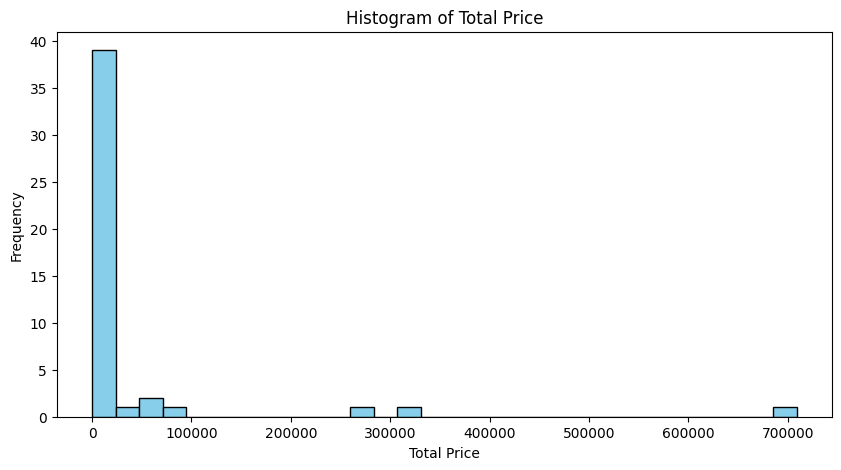

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(df['total'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

/Users/utsavacharya/Desktop/Projects/Invoice_Data_Miner/venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


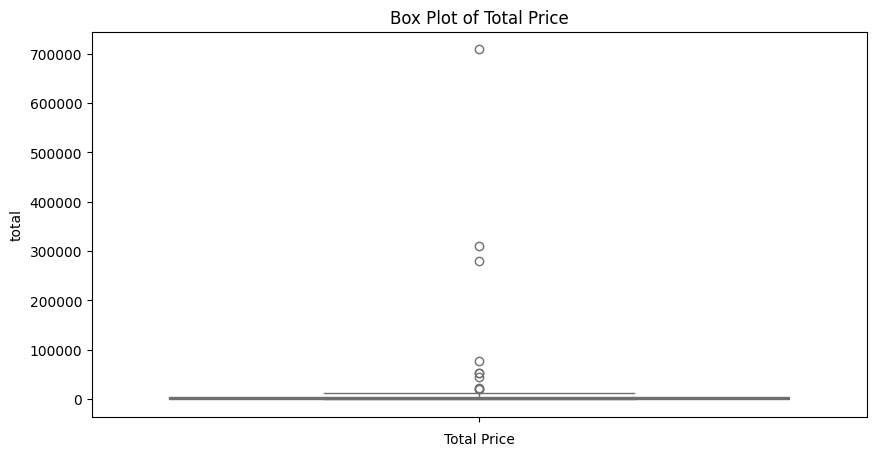

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['total'], color='skyblue')
plt.title('Box Plot of Total Price')
plt.xlabel('Total Price')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(df['total_price'], color='skyblue')
plt.title('Box Plot of Total Price')
plt.xlabel('Total Price')
plt.show()

### <a id='4'>Bounding Box Analysis</a>

In [20]:
def mean_bbox(bbox):
    return bbox.mean(axis=0).round(2)

In [21]:
print(mean_bbox(df["invoice_number_bbox"]))
print(mean_bbox(df["issue_date_bbox"]))
print(mean_bbox(df["total_bbox"]))
print(mean_bbox(df["table_bbox"]))

[564.27 202.09 630.86 213.51]
[533.96 235.2  607.   246.57]
[738.   806.22 802.52 819.54]
[ 54.78 461.59 824.61 633.27]


In [22]:
def plot_bounding_box(df, bbox_column):
    """
    This function plots a scatter plot of bounding box coordinates.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the bounding box data.
    bbox_column (str): The column name in df that contains the bounding box coordinates.
    
    Returns:
    None
    """
    x1_coords = [coord[0] for coord in df[bbox_column]]
    y1_coords = [coord[1] for coord in df[bbox_column]]
    x2_coords = [coord[2] for coord in df[bbox_column]]
    y2_coords = [coord[3] for coord in df[bbox_column]]

    plt.figure(figsize=(10, 10))
    plt.scatter(x1_coords, y1_coords, color='red')  
    plt.scatter(x2_coords, y2_coords, color='blue') 
    plt.gca().invert_yaxis()
    plt.title(f'Scatter Plot of {bbox_column}')
    plt.show()

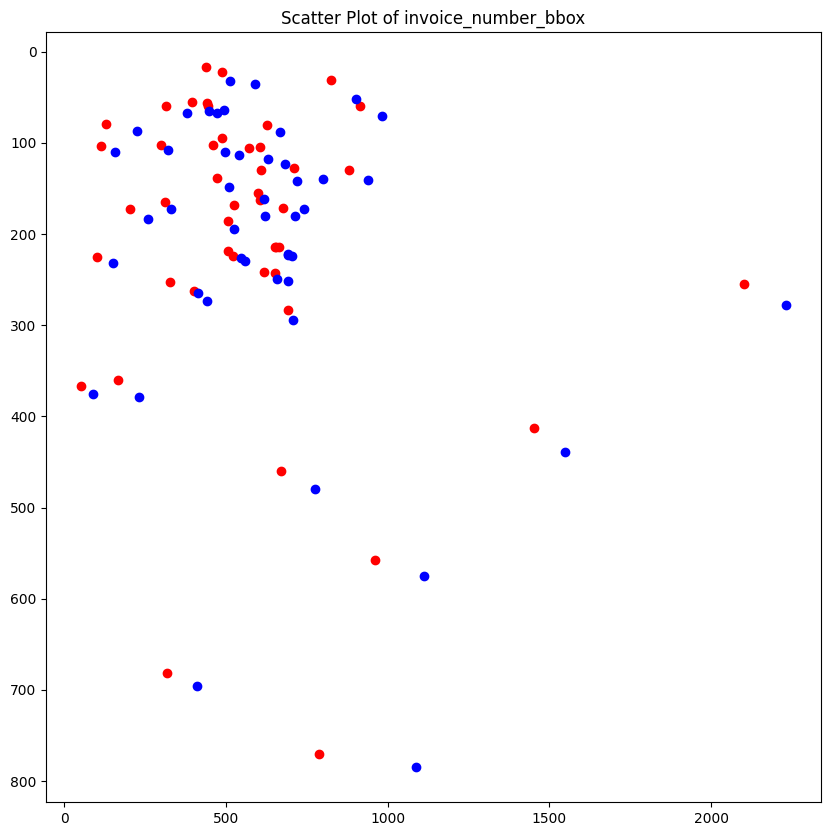

In [23]:
plot_bounding_box(df, "invoice_number_bbox")

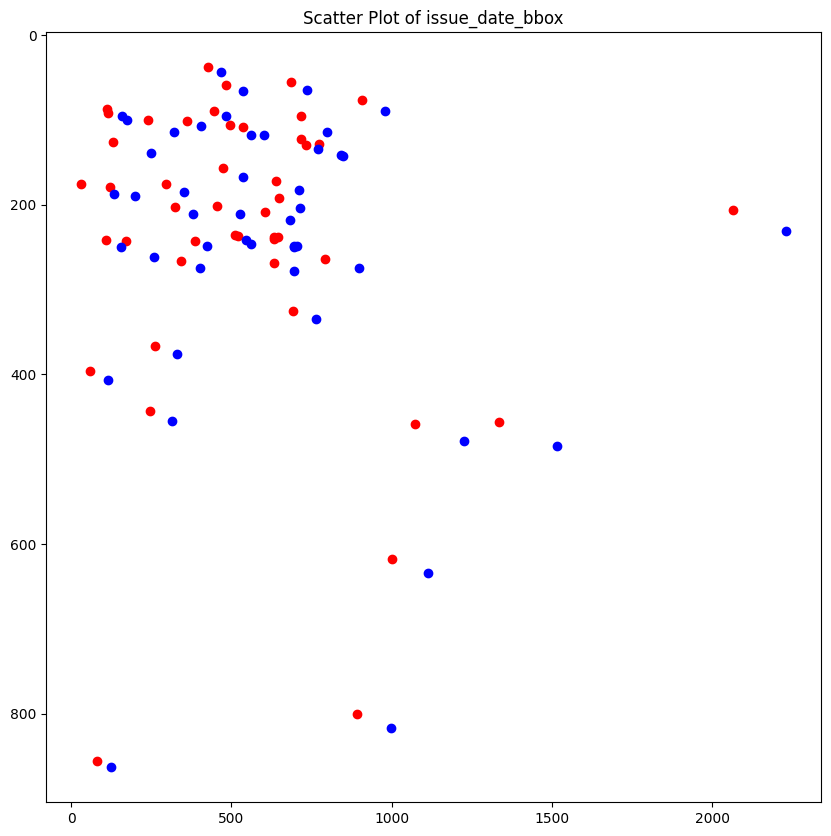

In [24]:
plot_bounding_box(df, "issue_date_bbox")


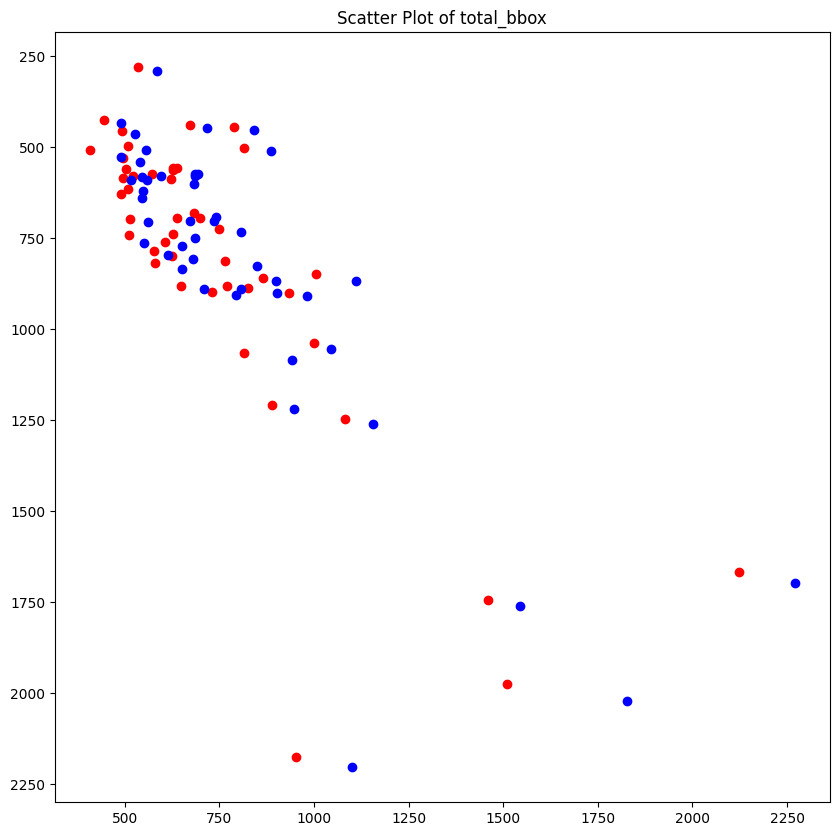

In [25]:
plot_bounding_box(df, "total_bbox")


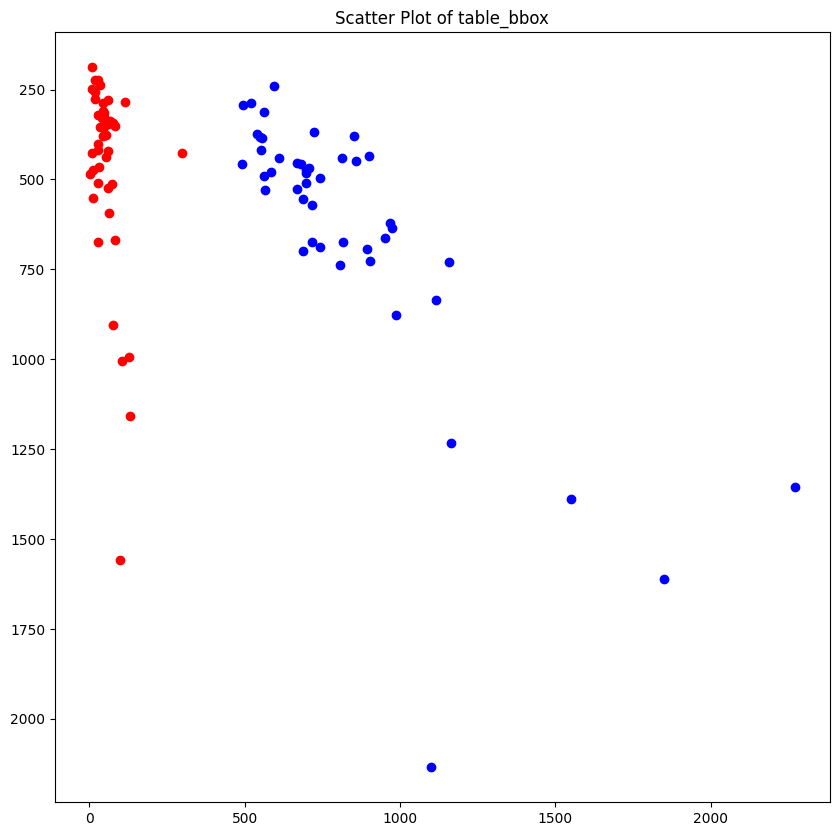

In [26]:
plot_bounding_box(df, "table_bbox")

This visualizations clearly shows that invoice number and date are mostly in top left wheras total amount is sometimes on the top and sometimes on the bottom. Table on the other hand is stretched from top to buttom. This can be further demonstrated by bbox visualizations.

In [27]:
def plot_bounding_box_rectangles(df, bbox_column):
    x1_coords = [coord[0] for coord in df[bbox_column]]
    y1_coords = [coord[1] for coord in df[bbox_column]]
    x2_coords = [coord[2] for coord in df[bbox_column]]
    y2_coords = [coord[3] for coord in df[bbox_column]]

    fig, ax = plt.subplots(1, figsize=(10, 10))
    for x1, y1, x2, y2 in df[bbox_column]:
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.xlim([min(x1_coords), max(x2_coords)])
    plt.ylim([min(y1_coords), max(y2_coords)])

    plt.title('Bounding Box Plot for {}'.format(bbox_column)) 
    plt.gca().invert_yaxis()
    plt.show()

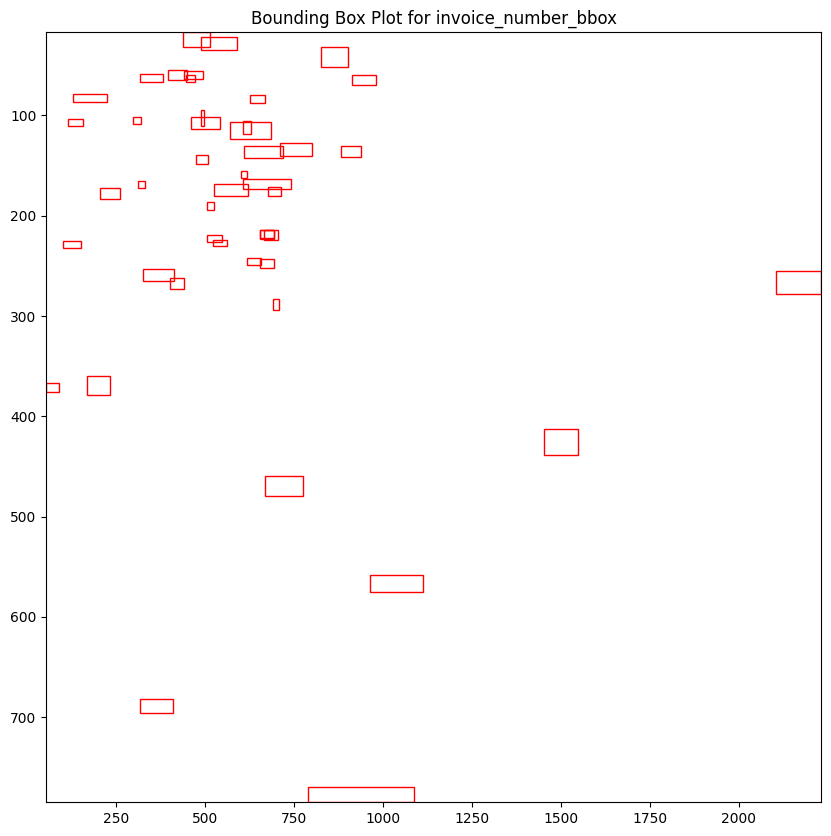

In [28]:
plot_bounding_box_rectangles(df, "invoice_number_bbox")

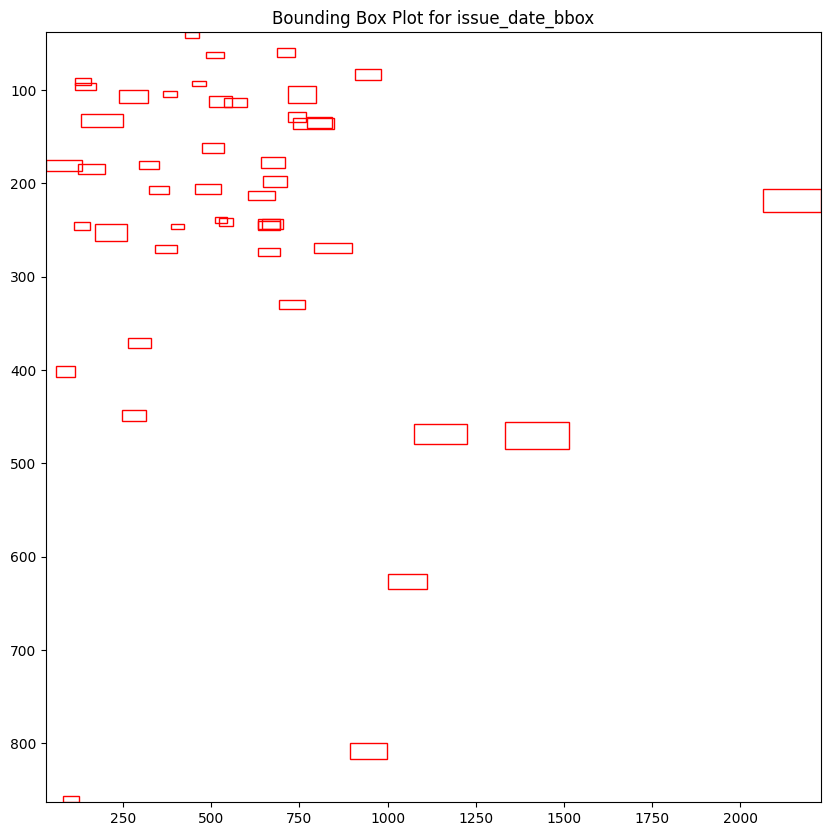

In [29]:
plot_bounding_box_rectangles(df, "issue_date_bbox")

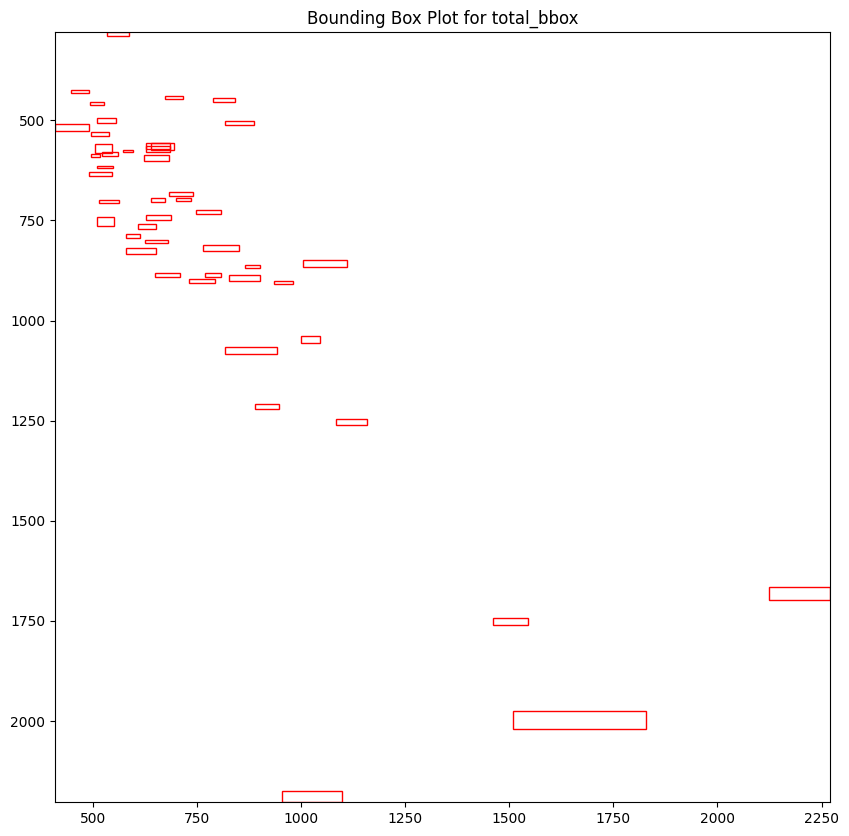

In [30]:
plot_bounding_box_rectangles(df, "total_bbox")

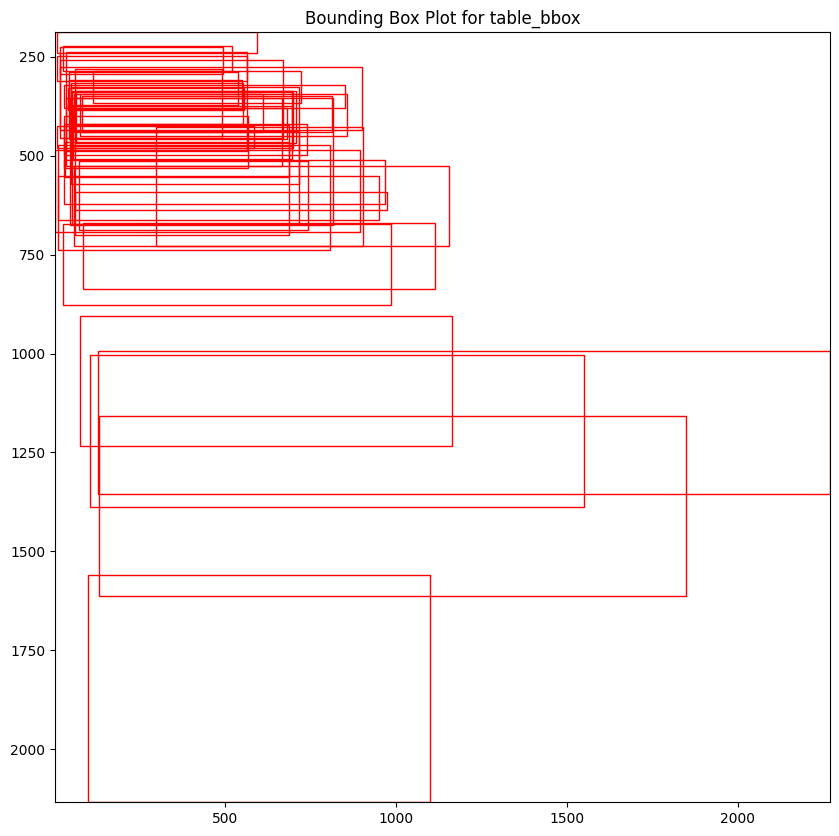

In [31]:
plot_bounding_box_rectangles(df, "table_bbox")

These visualizations show the position and area of each bboxes. Area of bboxes is analyzed below in depth as well

In [32]:
def area_df_former(bbox):
    df[bbox+"_area"]= df[bbox].apply(lambda x: (x[2]-x[0])*(x[3]-x[1]))

In [33]:
area_df_former("invoice_number_bbox")
area_df_former("issue_date_bbox")
area_df_former("total_bbox")
area_df_former("table_bbox")

In [34]:
print(df["invoice_number_bbox_area"].mean())
print(df["issue_date_bbox_area"].mean())
print(df["total_bbox_area"].mean())
print(df["table_bbox_area"].mean())

873.3471739130435
963.9565217391304
1157.5467391304346
154626.79289350112


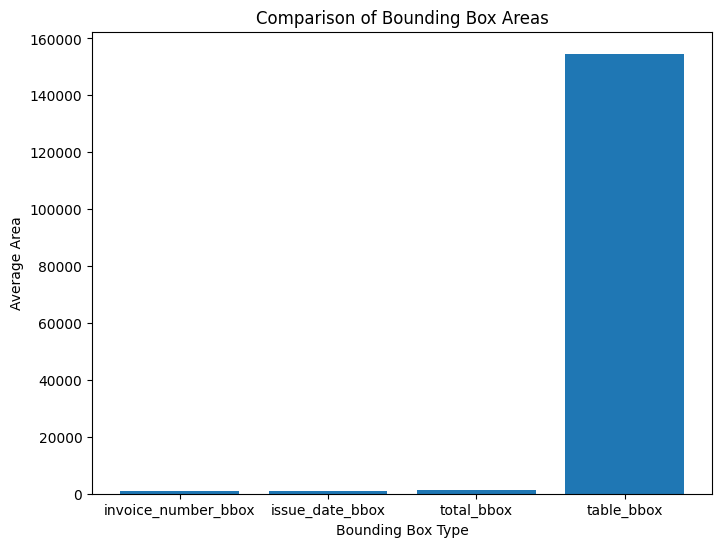

In [35]:
bbox_types = ['invoice_number_bbox', 'issue_date_bbox', 'total_bbox', 'table_bbox']
bbox_areas = [df[f"{bbox}_area"].mean() for bbox in bbox_types]

plt.figure(figsize=(8, 6))
plt.bar(bbox_types, bbox_areas)
plt.xlabel('Bounding Box Type')
plt.ylabel('Average Area')
plt.title('Comparison of Bounding Box Areas')
plt.show()


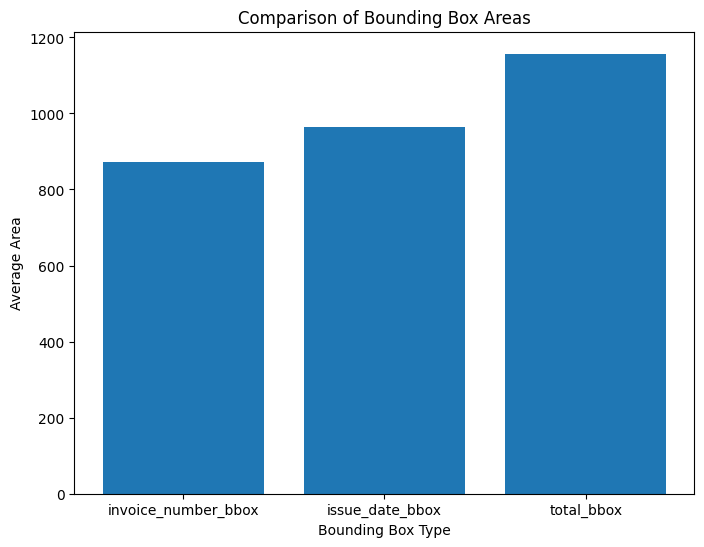

In [36]:
bbox_types = ['invoice_number_bbox', 'issue_date_bbox', 'total_bbox']
bbox_areas = [df[f"{bbox}_area"].mean() for bbox in bbox_types]

plt.figure(figsize=(8, 6))
plt.bar(bbox_types, bbox_areas)
plt.xlabel('Bounding Box Type')
plt.ylabel('Average Area')
plt.title('Comparison of Bounding Box Areas')
plt.show()

### <a id='5'>NLP Analysis on Table Column </a>

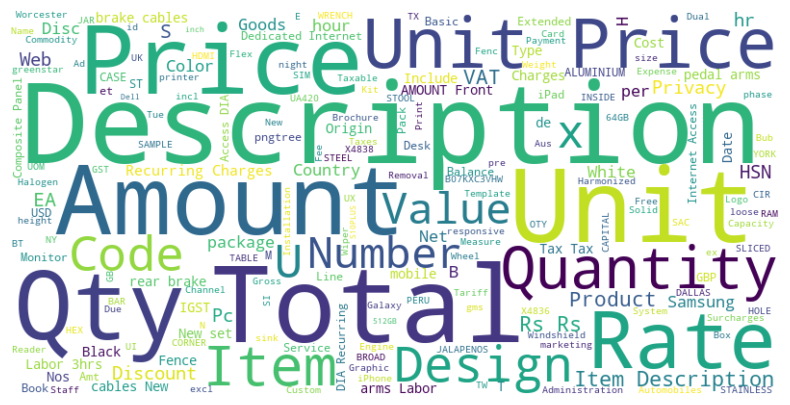

In [37]:
text = ' '.join(df['table'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

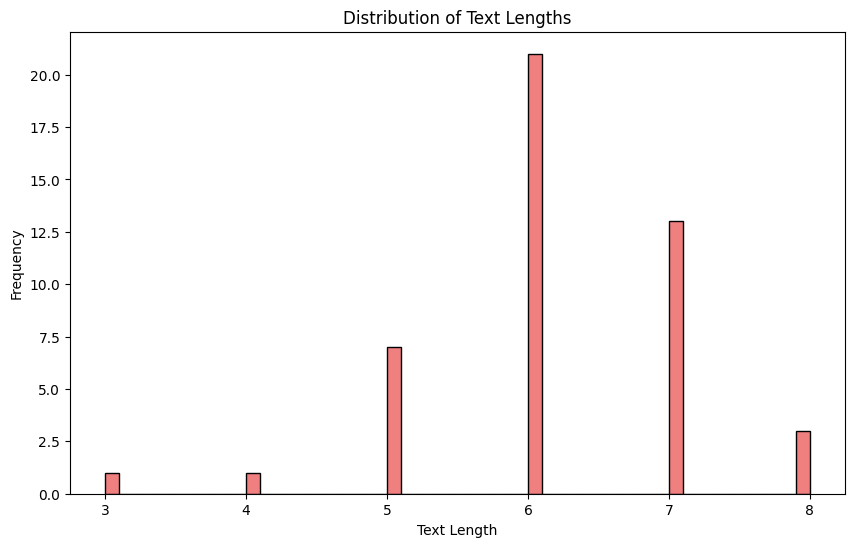

In [38]:
text_lengths = df['total'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='lightcoral', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

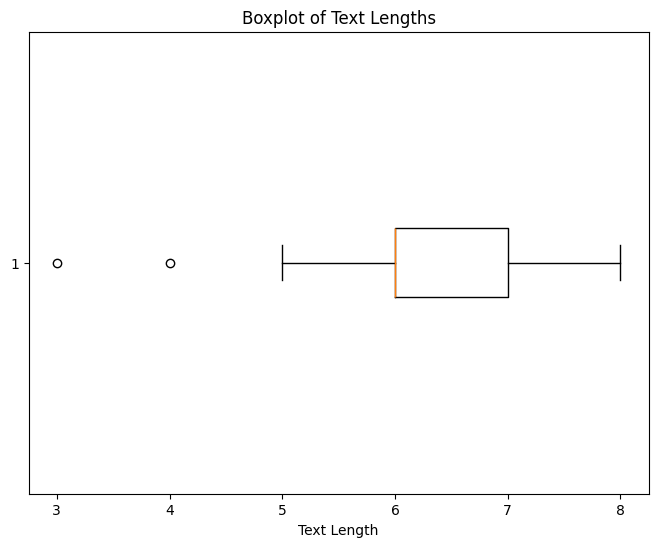

In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(text_lengths, vert=False)
plt.xlabel('Text Length')
plt.title('Boxplot of Text Lengths')
plt.show()

Let's look at the frequency of the most common words used in table.

In [40]:
special_words = ['amount','price', 'unit', 'rate', 'total', 'quantity', 'date', 'code']

In [41]:
words = text.split()

special_words_each = [word.lower() for word in words if word.lower() in special_words]

word_freq = Counter(special_words_each)

word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

In [42]:
word_freq_df

,Word,Frequency
5,price,35
4,unit,31
2,amount,27
3,total,26
1,rate,15
0,quantity,13
7,code,9
6,date,4


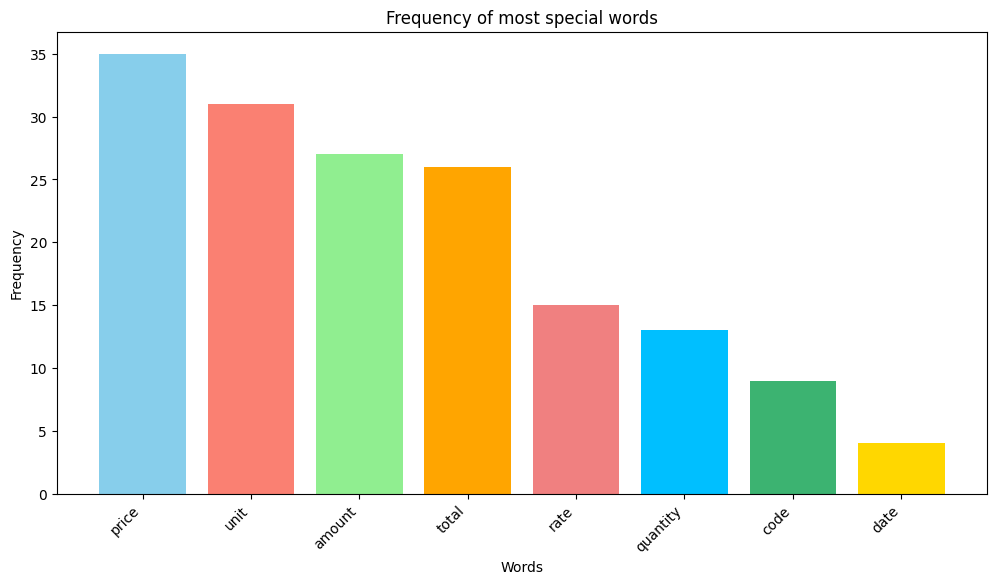

In [43]:
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'deepskyblue', 'mediumseagreen', 'gold']
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of most special words')
plt.xticks(rotation=45, ha='right')
plt.show()

For looking at how structured data was extracted from unstructured data, please [click here](./main.ipynb)